# Perspective Transform Example

Stop Sign Perspective Transformation

A stop sign is viewed from an angle. Apply a perspective transform so it looks like we're viewing it from the front.

We care about perspective transforms, because the software we write will eventually do this to images of a road so that we can find the lane curvature and looks more like a map representation

We first need to select 4 points that define a rectangle on a plane in the source image. Four points are enough to define a linear transformation from one perpective to another. In this case, we're selecting points that define a plane on the surface of the stop sign

We also need to define where we want those points to appear in our transformed(warped) image.

We can use opencv functions to calculate the function that maps the points in the original image to the warped image with a different perspective

Note: When you apply a perspective transform, choosing four source points manually, as we did in this video, is often not the best option. There are many other ways to select source points. For example, many perspective transform algorithms will programmatically detect four source points in an image based on edge or corner detection and analyzing attributes like color and surrounding pixels.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

%matplotlib inline

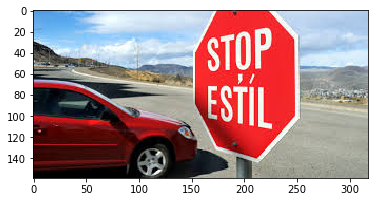

In [3]:
src_image = mpimg.imread("persp-image.jpeg")
plt.imshow(src_image);

In [4]:
# Points
# Top Right, Bottom Right, Bottom Left, Top Left
original_img_pts = [[250.061, 25.57], [251, 100], [152, 89], [152, 40]]
destination_pts = [[250, 25], [250, 100], [150, 100], [150, 25]]

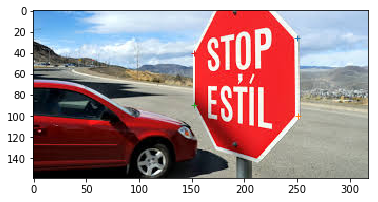

In [6]:

plt.imshow(src_image);
for x, y in original_img_pts:
    plt.plot(x, y, "+")
plt.show()

In [7]:

def warp(img, original_img_pts, destination_pts):
    """
        Function that returns a warped image of a given image
    """
    
    # Define calibration box in source(original) and destination(warped/desired) image
    
    image_shape = (img.shape[1], img.shape[0])
    
    # Four source coordinates
    src = np.float32(original_img_pts)
    
    # Four desired points - eyeballing a rectangle in that same image
    dst = np.float32(destination_pts)
    
    # Compute the perspective transformation matrix
    M = cv2.getPerspectiveTransform(src, dst)
    
    # We can also get the inverse perspective transform to unwarp the image 
    # using cv2.getPerspectiveTransform(dst, src)
    
    # cv2.INTER_LINEAR: How to fill in missing points as it warps an image
    # Linear interpolation
    return cv2.warpPerspective(img, M, image_shape, flags=cv2.INTER_LINEAR)

In [8]:
warped_image = warp(src_image, original_img_pts, destination_pts)


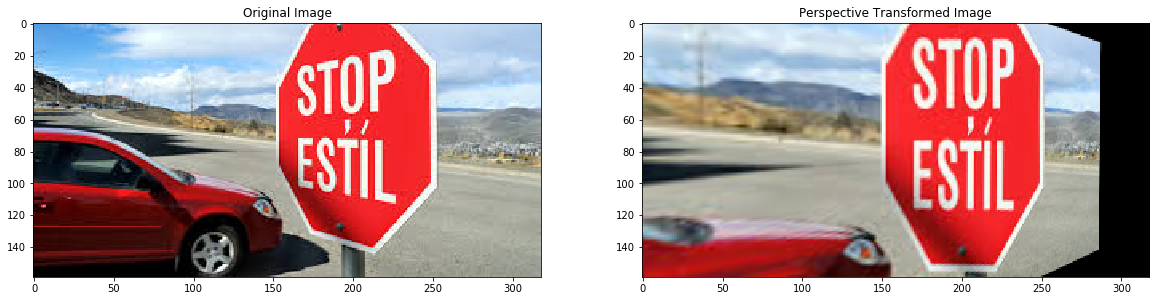

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.imshow(src_image);
ax1.set_title("Original Image")

ax2.imshow(warped_image)
ax2.set_title("Perspective Transformed Image")

plt.show()